# ***Importing libs***

In [161]:
import pickle #to save model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge ,Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

from xgboost import XGBClassifier




from sklearn.metrics import accuracy_score,f1_score,ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# ***First rows***

In [162]:
df=pd.read_csv("/content/conversion_data_train.csv")
print("Display of dataset: ")
display(df.head(3))
print()

Display of dataset: 


,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1


# ***Baisc stats***

In [163]:
print("Number of rows : {}".format(df.shape[0]))
print()
print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

Number of rows : 284580

Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


# ***Missing values***

In [164]:
print(df.isnull().any().value_counts())
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

False    6
dtype: int64
Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


# ***let's work on col age (feature engineering)***


In [166]:
df['age'].unique()

array([ 22,  21,  20,  23,  28,  29,  30,  38,  26,  31,  18,  27,  24,
        37,  42,  33,  45,  32,  39,  17,  34,  40,  25,  36,  62,  44,
        55,  41,  35,  49,  19,  43,  50,  47,  53,  52,  46,  48,  58,
        51,  57,  56,  61,  59,  60,  54,  67,  63, 111,  65,  64,  66,
        72,  68,  69,  70,  73,  79, 123,  77])

In [167]:
df['age_status']= df['age'].apply(lambda x: 'mineur' if x < 21 else
                                            'adult' if x < 50 else 'elder')

# ***Correlations***

In [168]:
# Correlation matrix
corr_matrix = df.corr().round(2)
import plotly.figure_factory as ff
fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())
fig.show()
     

<ipython-input-168-53dd797aee1d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [169]:
numeric_features = ['total_pages_visited', 'age']
categorical_features = ['country', 'new_user','source',] #'age_status' ] # Names of categorical columns in X_train/X_test
target_variable = 'converted'
# Separate target variable Y from features X
print("Separating labels from features...")

X = df.drop(target_variable, axis = 1)
Y = df.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
X.head()

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X :


,country,age,new_user,source,total_pages_visited,age_status
0,China,22,1,Direct,2,adult
1,UK,21,1,Ads,3,adult
2,Germany,20,0,Seo,14,mineur
3,US,23,1,Seo,3,adult
4,US,28,1,Direct,3,adult


In [170]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [171]:
#Preprocessings to be planned with scikit-learn
#Categorical variables : Store, Holiday_Flag
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first'))# missing values will be replaced by most frequent value
    ])
#Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [172]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [173]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head(2))
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:2,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head(2))
X_test = preprocessor.transform(X_test) 
print('...Done.')
print(X_test[0:2,:])


Performing preprocessings on train set...
       country  age  new_user  source  total_pages_visited age_status
178877   China   23         0  Direct                    2      adult
215523   China   28         0     Ads                    2      adult
...Done.
[[-0.85939501 -0.91458053  0.          0.          0.          0.
   1.          0.        ]
 [-0.85939501 -0.30994956  0.          0.          0.          0.
   0.          0.        ]]

Performing preprocessings on test set...
       country  age  new_user  source  total_pages_visited age_status
269237   China   24         1     Ads                   14      adult
23327       US   35         0  Direct                    5      adult
...Done.
[[ 2.73051047 -0.79365434  0.          0.          0.          1.
   0.          0.        ]
 [ 0.03808136  0.53653379  0.          0.          1.          0.
   1.          0.        ]]


# ***let's do the classifications***

In [174]:
logistic0 = LogisticRegression()
logistic0.fit(X_train, Y_train)
# Predictions on training set and on test set (to be able to evaluate with F1_score afterwards)
Y_train_pred = logistic0.predict(X_train)
Y_test_pred = logistic0.predict(X_test)

# F1 **Score** *texte en italique*

In [175]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on training set :  0.7640283915896611
f1-score on test set :  0.7595396729254997


In [176]:
table=pd.DataFrame(columns=['model name'])
table['model name']=[logistic0]
table['F1 score train']=[round(f1_score(Y_train, Y_train_pred),3)]
table['F1 score test']=[round(f1_score(Y_test, Y_test_pred),3)]
table

,model name,F1 score train,F1 score test
0,LogisticRegression(),0.764,0.76


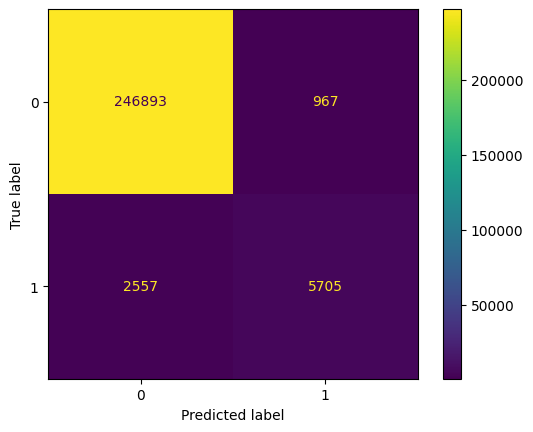

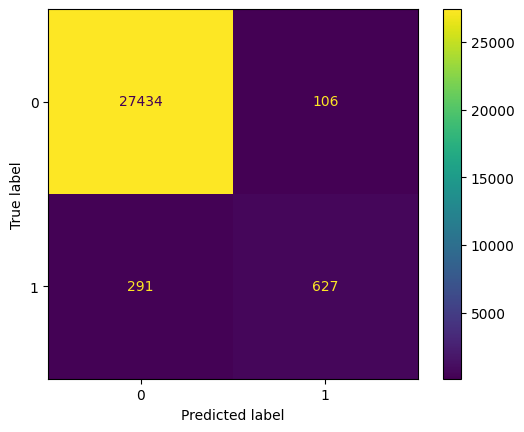

In [177]:
# Visualizing confusion matrix on test set
ConfusionMatrixDisplay.from_estimator(logistic0, X_train, Y_train)
ConfusionMatrixDisplay.from_estimator(logistic0, X_test, Y_test)

# ***model saving logistic reg***

In [179]:
# save the model to disk
filename = 'logisticregression.sav'
pickle.dump(logistic0, open(filename, 'wb'))

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

# ***Let's try others Models satrting with RandomForestClassifier***

In [180]:
print("Grid search...")
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [10],
    'min_samples_leaf': [5],
    'min_samples_split': [2],
    'n_estimators': [10, 20, 40]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 10, n_jobs = -1) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 40}
Best validation accuracy :  0.9859481027318535


In [181]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



# ***F1 Scores***

In [182]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.7756002942946959
f1-score on test set :  0.7531531531531531



In [183]:
df2 = {'model name': classifier, 
       'F1 score train': round(f1_score(Y_train, Y_train_pred),4),
       'F1 score test': round(f1_score(Y_test, Y_test_pred),4)
       }
table = table.append(df2, ignore_index = True)
  
display(table)

<ipython-input-183-61d691893d09>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model name,F1 score train,F1 score test
0,LogisticRegression(),0.7640,0.7600
1,RandomForestClassifier(),0.7756,0.7532


In [184]:
# save the model to disk
filename = 'RandomForestClassifier.sav'
pickle.dump(classifier, open(filename, 'wb'))

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

# ***decision tree ---> BaggingClassifier***


In [185]:
print('Training Bagging of decision tree...')
decision_tree = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, min_samples_split = 4) # Same hyperparameters as best RF model
bagging = BaggingClassifier(base_estimator=decision_tree, n_estimators = 40)
bagging.fit(X_train, Y_train)

Training Bagging of decision tree...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=5,
                                                        min_samples_split=4),
                  n_estimators=40)

In [186]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = bagging.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = bagging.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



# ***F1 score (decision tree)***

In [187]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.778686888844542
f1-score on test set :  0.7565947242206236



In [188]:
df2 = {'model name': decision_tree, 
       'F1 score train': round(f1_score(Y_train, Y_train_pred),4), 
       'F1 score test': round(f1_score(Y_test, Y_test_pred),4)
       }
table = table.append(df2, ignore_index = True)
  
display(table)

<ipython-input-188-48fb62400d9a>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model name,F1 score train,F1 score test
0,LogisticRegression(),0.7640,0.7600
1,RandomForestClassifier(),0.7756,0.7532
2,"DecisionTreeClassifier(max_depth=10, min_sampl...",0.7787,0.7566


In [189]:
table=table.iloc[0:3,:] #removing last line bcs i executed cell 154 twice (mistake)
table

,model name,F1 score train,F1 score test
0,LogisticRegression(),0.7640,0.7600
1,RandomForestClassifier(),0.7756,0.7532
2,"DecisionTreeClassifier(max_depth=10, min_sampl...",0.7787,0.7566


In [190]:
# save the model to disk
filename = 'DecisionTreeClassifier.sav'
pickle.dump(bagging, open(filename, 'wb'))

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

# ***XGB boost classifier we do the same steps***

In [191]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier()

# Grid of values to be tested
params = {
    'max_depth': [10],
    'min_child_weight': [1, 2, 4,5, 6, 8],
    'n_estimators': [40]
}
print(params)
gridsearch_xgboost = GridSearchCV(xgboost, param_grid = params, cv = 10, verbose = 1,  n_jobs = -1) # cv : the number of folds to be used for CV
gridsearch_xgboost.fit(X_train, Y_train)

Grid search...
{'max_depth': [10], 'min_child_weight': [1, 2, 4, 5, 6, 8], 'n_estimators': [40]}
Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [10],
                         'min_child_weight': [1, 2, 4, 5, 6, 8],
                         'n_estimators': [40]},
             verbose=1)

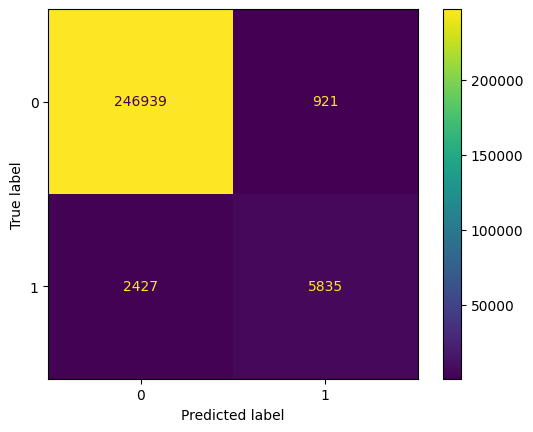

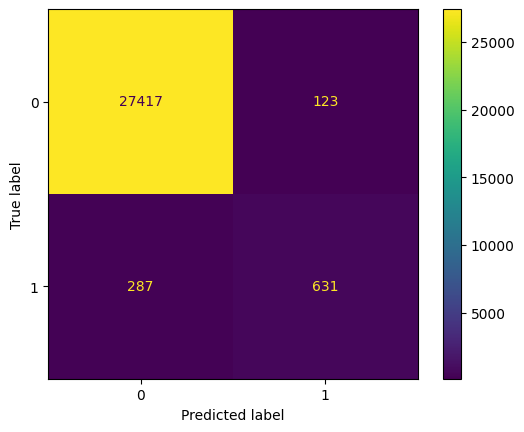

In [192]:
Y_train_pred = gridsearch_xgboost.predict(X_train)
Y_test_pred = gridsearch_xgboost.predict(X_test)
ConfusionMatrixDisplay.from_estimator(gridsearch_xgboost, X_train, Y_train)
ConfusionMatrixDisplay.from_estimator(gridsearch_xgboost, X_test, Y_test)

In [193]:
df2 = {'model name': xgboost, 
       'F1 score train': round(f1_score(Y_train, Y_train_pred),4),
       'F1 score test': round(f1_score(Y_test, Y_test_pred),4)}
table = table.append(df2, ignore_index = True)
  
display(table)

<ipython-input-193-542e40fc078b>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model name,F1 score train,F1 score test
0,LogisticRegression(),0.7640,0.7600
1,RandomForestClassifier(),0.7756,0.7532
2,"DecisionTreeClassifier(max_depth=10, min_sampl...",0.7787,0.7566
3,"XGBClassifier(base_score=None, booster=None, c...",0.7771,0.7548


In [194]:
# save the model to disk
filename = 'gridsearch_xgboost.sav'
pickle.dump(gridsearch_xgboost, open(filename, 'wb'))

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

# ***Random forest classifier***

...Done.
Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 150}
Best validation accuracy :  0.9860183812233576
f1-score on training set :  0.7653213751868461
f1-score on test set :  0.7544180377818402


<ipython-input-195-21b1702630bd>:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model name,F1 score train,F1 score test
0,LogisticRegression(),0.7640,0.7600
1,RandomForestClassifier(),0.7756,0.7532
2,"DecisionTreeClassifier(max_depth=10, min_sampl...",0.7787,0.7566
3,"XGBClassifier(base_score=None, booster=None, c...",0.7771,0.7548
4,RandomForestClassifier(),0.7653,0.7544


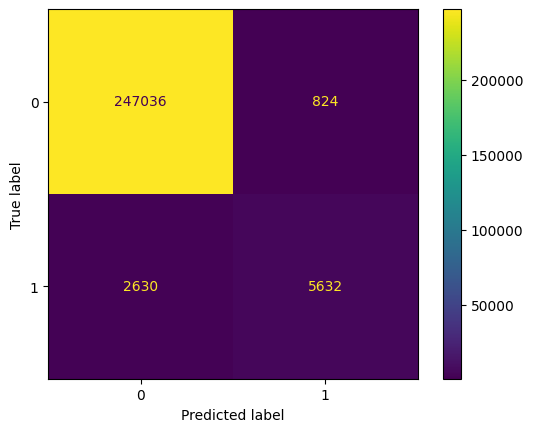

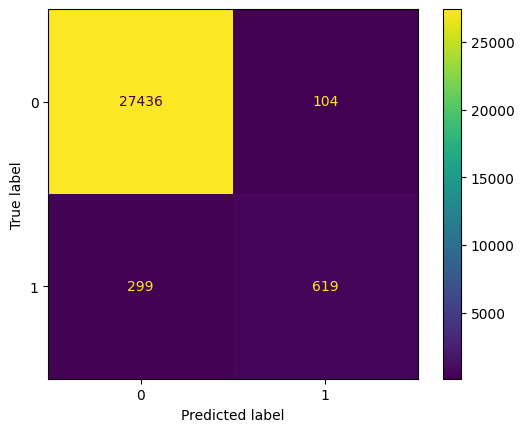

In [195]:
# Perform grid search
classifierrandomforest = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4,8,12],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,3,4],
    'n_estimators': [100,125,150]
}
gridsearch = GridSearchCV(classifierrandomforest, param_grid = params, cv = 5, n_jobs = -1)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
####################################################################
Y_train_pred = gridsearch.predict(X_train)
Y_test_pred = gridsearch.predict(X_test)
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train)
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test)
#####################################################################
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
########################################################################
df2 = {'model name': classifierrandomforest, 
       'F1 score train': round(f1_score(Y_train, Y_train_pred),4),
       'F1 score test': round(f1_score(Y_test, Y_test_pred),4)}
table = table.append(df2, ignore_index = True)
  
display(table)
########################################################################
# save the model to disk
filename = 'classifierrandomforest.sav'
pickle.dump(classifierrandomforest, open(filename, 'wb'))

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

In [213]:
table

,model name,F1 score train,F1 score test
0,LogisticRegression(),0.7640,0.7600
1,RandomForestClassifier(),0.7756,0.7532
2,"DecisionTreeClassifier(max_depth=10, min_sampl...",0.7787,0.7566
3,"XGBClassifier(base_score=None, booster=None, c...",0.7771,0.7548
4,RandomForestClassifier(),0.7653,0.7544
